In [1]:
from Aorsa_Analysis import Aorsa_Analysis
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Local Directories 
#HOME = '/c/Users/jacob/'
HOME = os.path.expanduser('~')
#workdir = HOME+'/Desktop/HFS_HHFW_antenna/AORSA_MCGO_Scripts/AORSA/shots/147634/'  # mfews absolute path to working directory 
#workdir = HOME+'/Desktop/HFS_HHFW_antenna/AORSA_MCGO_Scripts/AORSA/shots/174658/'  # mfews absolute path to working directory 
workdir = HOME+"/OneDrive/Desktop/Desktop MIT/Research Folder/Steve Research Folder Master/AORSA_MCGO_SCRIPTS/AORSA/AORSA/shots/147634/" # home ws

eqdsk_file = workdir + '/g147634.04525'
print(HOME)
print(workdir)
print(eqdsk_file)

# Perlmutter directories only needed if runnnig from home system and want to send final file to perlmutter
host = 'perlmutter.nersc.gov'
username = 'vandelij'
perlmutter_path_to_case = '~/aorsa3/aorsa/jacob_local/shots/DIIID147634/'

C:\Users\jacob
C:\Users\jacob/OneDrive/Desktop/Desktop MIT/Research Folder/Steve Research Folder Master/AORSA_MCGO_SCRIPTS/AORSA/AORSA/shots/147634/
C:\Users\jacob/OneDrive/Desktop/Desktop MIT/Research Folder/Steve Research Folder Master/AORSA_MCGO_SCRIPTS/AORSA/AORSA/shots/147634//g147634.04525


In [11]:
# generate practice profiles as an example. 
rho_grid = np.linspace(0, 1, 100)
T0 = 10
n0 = 2e20
nsep = 1e18
Tsep = .9
alpha = 2 # these are jsut for generating the example profiles
beta = 1.3

# bulk electron and deuterium, fast deuterium density
ne_profile = n0*(1 - rho_grid**alpha)**beta + nsep
nD_profile = n0*(1 - rho_grid**alpha)**beta + nsep
nDfast_profile = nD_profile/10 # this creates a crude population of neutral beam deuterons

# 

Te_profile = T0*(1 - rho_grid**alpha)**beta + Tsep
TD_profile = T0*(1 - rho_grid**alpha)**beta + Tsep
TDfast_profile = TD_profile*10 # this makes hot neutral beam
#plt.plot(rho_grid, Te_profile)

In [12]:
# here, I am going to try uploading the genray profiles and plotting. 
# testing 
aorsa_test2 = Aorsa_Analysis(rho_type='rho_tor')
aorsa_test2.local_work_dir = workdir
aorsa_test2.aorsa2din_template = 'aorsa2d_template.in'

# setting up directories
aorsa_test2.local_work_dir = workdir
aorsa_test2.remote_work_dir = perlmutter_path_to_case

# give file name with pol and corrisponding tor rho grid to make the map. This comes from eqdsk
aorsa_test2.rho_pol = 'rho_pol147634.txt' # sqrt(pol flux)
aorsa_test2.rho_tor = 'rho_tor147634.txt' # sqrt(tor flux)


# set up the species

# electrons
aorsa_test2.set_species(name='e', mass=9.11e-31, 
                        charge=-1.6022e-19, density=ne_profile, temp=Te_profile, rho=rho_grid, ndisti=0) # ndisti sets maxwellian vs non-maxwellian treatment for species
# Bulk Deuterium
aorsa_test2.set_species(name='D', mass=3.3687870052e-027, 
                        charge=1.6022e-19, density=nD_profile, temp=TD_profile, rho=rho_grid, ndisti=0)

# Fast Deuterium
aorsa_test2.set_species(name='Dfast', mass=3.3687870052e-027, 
                        charge=1.6022e-19, density=nDfast_profile, temp=TDfast_profile, rho=rho_grid, ndisti=0)

self.aorsa_nml[STATE][S_T_S] after zerowing: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

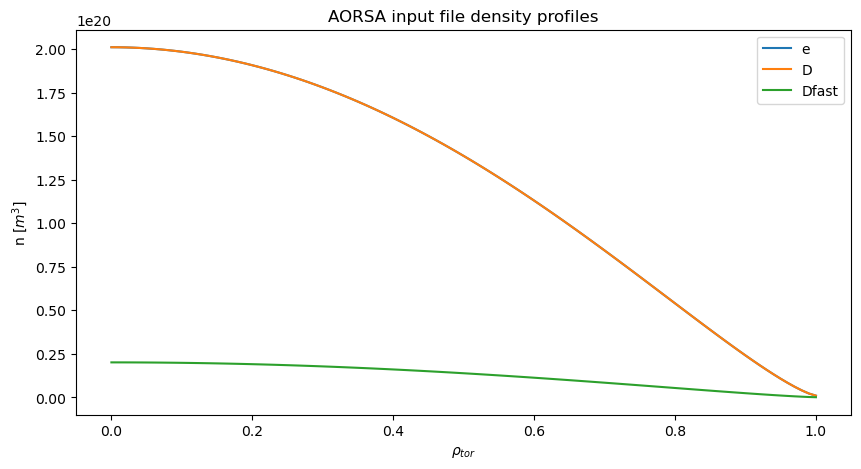

In [13]:
aorsa_test2.load_template()  # load in the template
aorsa_test2.set_state() # loads up the species profiles into the aorsa.in nml
aorsa_test2.plot_density()


In [14]:
# Save antenna properties
aorsa_test2.setup_antenna(power=.6e6, freq=96e6, nstrap=2, i_antenna=0, R=1.12, Z=0, straplength=0.4,
                      strapwidth=9.4e-2, dist_btwn_straps=24.4e-2, npi_array=-11, 
                      d_psi_ant=0.025, antlc=5, 
                      nphi_number=1, phase_array=[0., 180.0, 0., 180.0])

# Save computational box
aorsa_test2.setup_computational_box(psilim=0.999, ytop=1.07, ybottom=-1.26, rwright=2.317, 
                                rwleft=1.022, n_prof_flux=1, iprofile=5)

# Set up cluster solve 
aorsa_test2.setup_resolution_and_proc_grid(nmodesx=128, nmodesy=128, nprow=32, npcol=32, lmax=9, lmaxe=1)

# power absorption and non-maxwellian velocity grid: 
aorsa_test2.set_wdot_and_nonmax(enorm_factor=0.0, nuper=150, nupar=300, use_new_wdot=True,
                            nzeta_wdote=51, nzeta_wdoti=51)

# species setup 
aorsa_test2.species_specifications()

# noise control 
aorsa_test2.set_noise_control(z2_electron=1, upshift=1, xkperp_cutoff=0.5, damping=100.0, delta0=4.0e-05)

updating antenna perameters...


In [16]:
# Save to workdir
aorsa_test2.save_aorsa2d_out()

Saved aorsa namelist to C:\Users\jacob/OneDrive/Desktop/Desktop MIT/Research Folder/Steve Research Folder Master/AORSA_MCGO_SCRIPTS/AORSA/AORSA/shots/147634/aorsa2d_modified.in
